<a href="https://colab.research.google.com/github/99kenny/Deep-Learning/blob/main/VGGNet_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cd /content/drive/MyDrive/"Colab Notebooks"/DeepLearningImplementation/Deep-Learning

!git config --global user.email 'helloiamkenny@gmail.com'
!git config --global user.name '99kenny'

# VGGNet
- dataset : CIFAR-10

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from keras.models import Model
from keras import optimizers, regularizers, utils
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from tensorflow.keras.utils import to_categorical

In [7]:
# download data
cifar10 = tf.keras.datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


In [8]:
train_images = train_images - np.mean(train_images, axis=(0, 1, 2))
test_images = test_images - np.mean(test_images, axis=(0, 1, 2))


mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images, axis=(0, 1, 2, 3))
train_images = (train_images - mean)/(std+1e-7)
test_images = (test_images - mean)/(std+1e-7)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# split data -> validation, test
# valid_images, valid_labels = test_images[0:5000,:], test_labels[0:5000,:]
# test_images, test_labels = test_images[5000:,:], test_labels[5000:,:]

# print(valid_images.shape)
# print(valid_labels.shape)

In [9]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,
            )  # randomly flip images

datagen.fit(train_images)

In [19]:
weight_decay = 0.0005
img_rows, img_cols = 32, 32
img_channels = 3 
num_classes = 10
img_dim = (img_rows, img_cols, img_channels)  
img_input = Input(shape=img_dim)

def vgg_model_16():
  model = tf.keras.Sequential()

  model.add(Conv2D(64, (3, 3), padding='same',
    input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


model16 = vgg_model_16()
models = [model16]

# 드롭아웃

# Train

In [21]:
hist = []
for model in models:
  model.load_weights('/content/drive/MyDrive/Colab Notebooks/DeepLearningImplementation/Deep-Learning/cifar10vgg.h5')
  model.compile(optimizer='Adam', 
                loss='categorical_crossentropy', metrics=['accuracy'])


  from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
  learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                              patience=3, 
                                              verbose=1, 
                                              factor=0.1, 
                                              min_lr=0.000000001)

  hist.append(model.fit(datagen.flow(train_images, train_labels, batch_size=256), epochs=60,
            validation_data=(test_images, test_labels),callbacks = [learning_rate_reduction]))

Epoch 1/60
196/196 [==============================] - 37s 174ms/step - loss: 1.0536 - accuracy: 0.8087 - val_loss: 1.9286 - val_accuracy: 0.7608 - lr: 0.0010
Epoch 2/60
196/196 [==============================] - 34s 174ms/step - loss: 1.0870 - accuracy: 0.8285 - val_loss: 1.2885 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 3/60
196/196 [==============================] - 34s 173ms/step - loss: 1.1158 - accuracy: 0.8366 - val_loss: 1.1824 - val_accuracy: 0.8399 - lr: 0.0010
Epoch 4/60
196/196 [==============================] - 34s 174ms/step - loss: 1.1465 - accuracy: 0.8388 - val_loss: 1.2848 - val_accuracy: 0.8138 - lr: 0.0010
Epoch 5/60
196/196 [==============================] - 36s 182ms/step - loss: 1.1648 - accuracy: 0.8407 - val_loss: 1.2494 - val_accuracy: 0.8311 - lr: 0.0010
Epoch 6/60
196/196 [==============================] - ETA: 0s - loss: 1.1891 - accuracy: 0.8411
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
196/196 [============================

# Test

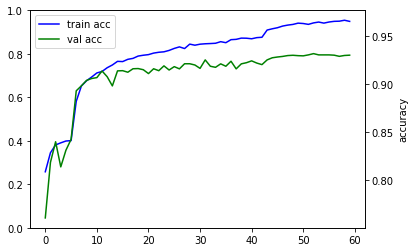

In [22]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()


acc_ax.plot(hist[0].history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist[0].history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [29]:
outputs = models[0].predict(test_images)


e1 = tf.keras.metrics.categorical_accuracy(
    test_labels, outputs
)

e2 = tf.keras.metrics.top_k_categorical_accuracy(
    test_labels, outputs, k=5
)

print("top-1 error: ", (np.count_nonzero(e1 == 0) / 10000))
print("top-5 error: ", (np.count_nonzero(e2 == 0) / 10000))

313/313 [==============================] - 3s 8ms/step
top-1 error:  0.0702
top-5 error:  0.0014
